# Getting and looking at the data

In [1]:
from sklearn.datasets import load_iris

iris_data = load_iris()

In [2]:
x = iris_data["data"]
y = iris_data["target"]

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_features_vs_target(data):
    x = data['data']
    y = data['target']
    number_of_plots = len(data.feature_names)
    fig, axs = plt.subplots(number_of_plots, 1, figsize=(12, number_of_plots * 8))
    for number, feature in enumerate(data.feature_names):
        current_feature = x[:, number]
        axs[number].scatter(current_feature, y, label="{}".format(feature))
        axs[number].set_xlabel(feature)
        axs[number].set_ylabel("target")
        axs[number].set_title("Dependence of target from {}".format(feature))
    plt.savefig("Correlations.png")
    plt.show()

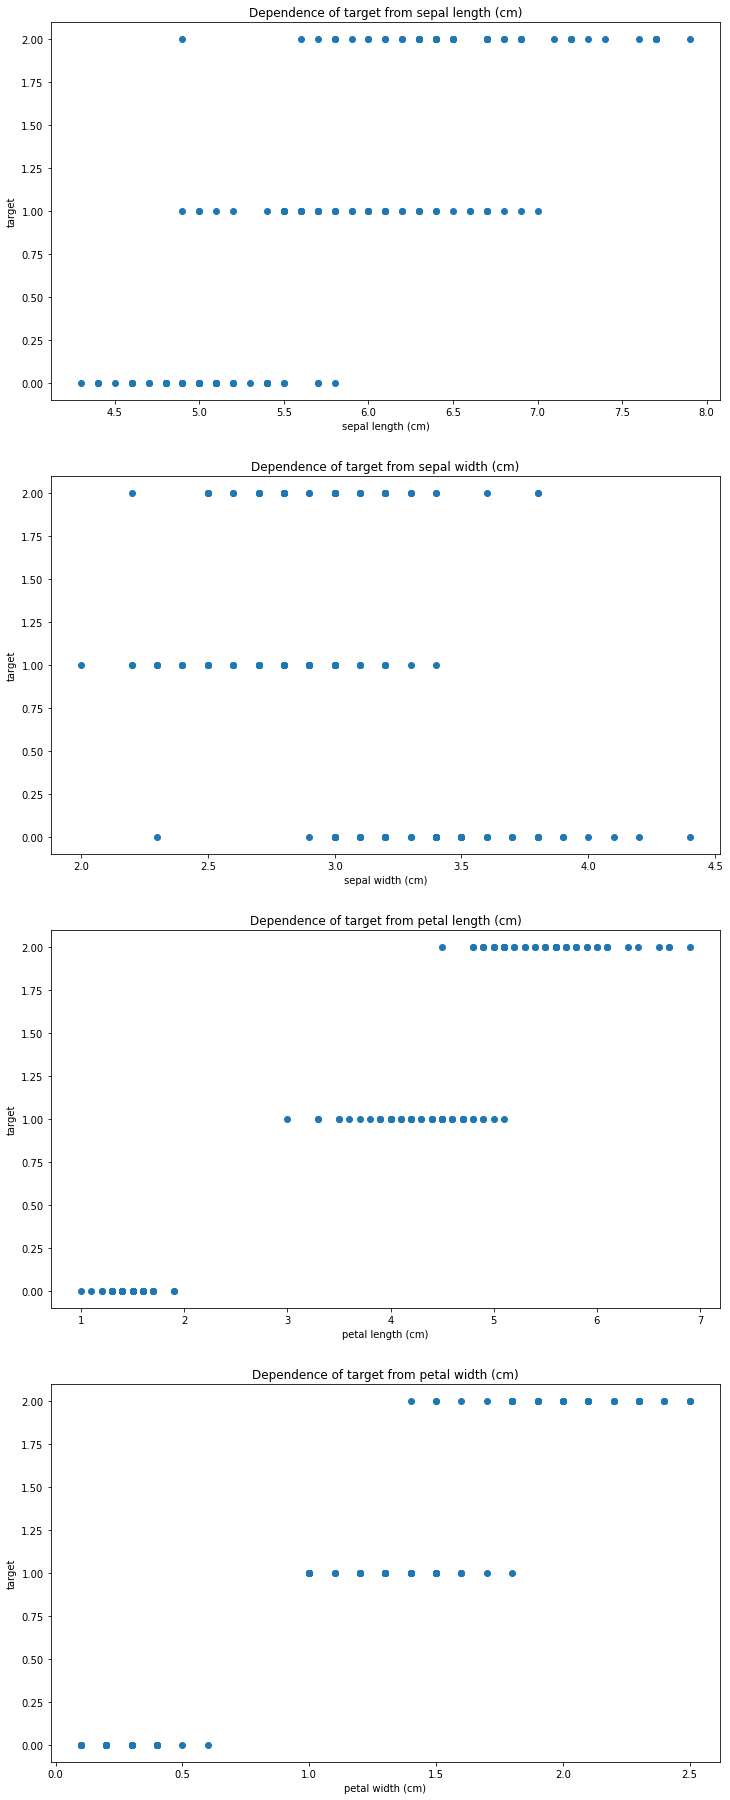

In [4]:
plot_features_vs_target(iris_data)

# Builing an LinearSVC model

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

lin_classifier = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

x = iris_data["data"]
y = iris_data["target"]

lin_classifier.fit(x, y)

C:\python\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [7]:
def print_scores(y, y_hat):
    accuracy= accuracy_score(y, y_hat)
    precision= precision_score(y, y_hat, average="micro")
    recall=recall_score(y, y_hat, average="micro")
    print("Accuracy score: {}".format(accuracy))
    print("Precision score: {}".format(precision))
    print("Recall score: {}".format(recall))

In [8]:
y_hat = lin_classifier.predict(x)
print_scores(y, y_hat)

Accuracy score: 0.9266666666666666
Precision score: 0.9266666666666666
Recall score: 0.9266666666666666


# Building an SGDClassifier model

In [10]:
from sklearn.linear_model import SGDClassifier

C = 5
x_scaled = StandardScaler().fit_transform(x)
alpha = 1 / (C * len(x_scaled))

sgd_clf = SGDClassifier(loss="hinge", learning_rate='constant', 
                        eta0=0.001, alpha=alpha, max_iter=1000, 
                        tol=1e-3, random_state=42)

sgd_clf.fit(x, y)

SGDClassifier(alpha=0.0013333333333333333, eta0=0.001, learning_rate='constant',
              random_state=42)

In [11]:
y_hat = sgd_clf.predict(x)
print_scores(y, y_hat)

Accuracy score: 0.8066666666666666
Precision score: 0.8066666666666666
Recall score: 0.8066666666666666


In [12]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

c = [1, 5, 10, 20, 50, 100]
alpha = [1 / (value * len(x_scaled)) for value in c]
params_grid = [
    {"alpha": alpha},
    {"learning_rate": ["constant", "optimal"]},
    {"eta0": [0.001, 0.002, 0.003, 0.004]},
    {"tol": [1e-2, 1e-3, 1e-4]},
    {"max_iter": [1000, 2000, 3000]},
    {"loss": ["hinge"]},
    {"random_state": [42]},
    {"penalty": ["l1", "l2", "elasticnet"]}
]

sgd_clf = SGDClassifier()
grid_search = GridSearchCV(sgd_clf, params_grid, cv=3, scoring='accuracy')
grid_search.fit(x_scaled, y)

C:\python\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 69.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 890, in fit
    return self._fit(
  File "C:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 658, in _fit
    self._validate_params()
  File "C:\python\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 148

GridSearchCV(cv=3, estimator=SGDClassifier(),
             param_grid=[{'alpha': [0.006666666666666667, 0.0013333333333333333,
                                    0.0006666666666666666,
                                    0.0003333333333333333,
                                    0.00013333333333333334,
                                    6.666666666666667e-05]},
                         {'learning_rate': ['constant', 'optimal']},
                         {'eta0': [0.001, 0.002, 0.003, 0.004]},
                         {'tol': [0.01, 0.001, 0.0001]},
                         {'max_iter': [1000, 2000, 3000]}, {'loss': ['hinge']},
                         {'random_state': [42]},
                         {'penalty': ['l1', 'l2', 'elasticnet']}],
             scoring='accuracy')

In [13]:
grid_search.best_params_

{'eta0': 0.004}

In [14]:
sgd_clf = grid_search.best_estimator_
y_hat = sgd_clf.predict(x_scaled)
print_scores(y, y_hat)

Accuracy score: 0.9733333333333334
Precision score: 0.9733333333333334
Recall score: 0.9733333333333334


# Building an SVMClassifier

In [15]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C = 5)
svm_clf.fit(x_scaled, y)

SVC(C=5, kernel='linear')

In [16]:
y_hat = svm_clf.predict(x_scaled)
print_scores(y, y_hat)

Accuracy score: 0.9733333333333334
Precision score: 0.9733333333333334
Recall score: 0.9733333333333334
